In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Vectors

### 1.1 Vectors

In [2]:
x = np.array([1,5,2,7])

In [5]:
#indexing
x[2]

2

In [7]:
# assign rather than copy
y = x
x[2] = 20
y

array([ 1,  5, 20,  7])

In [8]:
# element wise operation
z = np.array([1,5,2,7])
x == z

array([ True,  True, False,  True])

In [9]:
# stack vectors
np.concatenate((x,z))

array([ 1,  5, 20,  7,  1,  5,  2,  7])

In [11]:
type([x, z])

list

In [14]:
# slicing vector
x = np.array([1,5,6,2,7,8,1,3])
x[1:len(x):3]

array([5, 7, 3])

In [17]:
# list of vectors
x = [1,2] #python list
y = [5,2]
z = [6,2]
[x,y,z][1]

[5, 2]

In [19]:
np.random.randn(10)

array([ 0.60075867,  2.07609105,  0.21299705,  0.93891154,  1.88125371,
       -0.44346736,  0.69278261, -0.43287883,  1.29009454, -0.68314982])

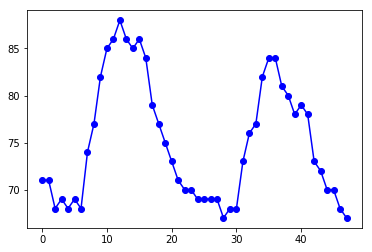

In [23]:
# plot
temps = [ 71, 71, 68, 69, 68, 69, 68, 74, 77, 82, 85, 86,
88, 86, 85, 86, 84, 79, 77, 75, 73, 71, 70, 70, 69, 69, 69,
69, 67, 68, 68, 73, 76, 77, 82, 84, 84, 81, 80, 78, 79, 78,
73, 72, 70, 70, 68, 67 ]
plt.plot(temps, '-bo')

### 1.2 Vector Addition 
### 1.3 scalar-vector, element-wise Operation

In [24]:
x = np.array([6,1,8,2,6])
x/3

array([2.        , 0.33333333, 2.66666667, 0.66666667, 2.        ])

In [27]:
y = np.array([2,7,2,8,5])
x ** y

array([  36,    1,   64,  256, 7776], dtype=int32)

In [29]:
# linear combination of vectors
a = np.array([1,2])
b = np.array([3,4])
alpha = -0.5
beta = 1.5

def lincomb(coeff, vectors):
    n = len(coeff)
    comb = np.zeros(n)
    for i in range(n):
        comb = comb + coeff[i]*vectors[i]
        
    return comb

lincomb([alpha, beta], [a, b])

array([4., 5.])

In [31]:
def lincomb2(coeff, vectors):
    return sum(coeff[i]*vectors[i] for i in range(len(vectors)))

In [32]:
lincomb2([alpha, beta], [a, b])

array([4., 5.])

### 1.4 Inner Product

In [33]:
# Inner Product of two n-vector
x = np.array([-1,2,2])
y = np.array([1,0,-3])

In [34]:
np.inner(x,y)

-7

In [35]:
x @ y

-7

In [39]:
# e.g. NPV
c = np.array([0.1,0.1,0.1,1.1]) #cash flow vector
n = len(c)
r = 0.05 #5% per-period interest rate

d = [(1+r)**-i for i in range(n)]
NPV = c@d

In [38]:
d @ c

1.236162401468524

In [43]:
# e.g.
s = np.concatenate([np.zeros(10), np.ones(3), np.zeros(len(temps)-10-3)])
s@temps

259.0

# 2. Functions

### 2.1 Linear Functions

In [2]:
f = lambda x: x[0] + x[1] - x[3]**2
f([-1,0,1,2])

-5

In [3]:
f(np.array([-1,0,1,2]))

-5

#### Superposition: function f(x) = a@x is linear

In [4]:
a = np.array([-2,0,1,-3])
x = np.array([2,2,-1,1])
y = np.array([0,1,-1,0])
alpha = 1.5
beta = -3.7

In [7]:
LHS = np.inner(alpha*x+beta*y, a)
RHS = alpha*np.inner(x,a) + beta* (y@a)
LHS == RHS

True

### 2.2 Taylor Expansion

In [26]:
f = lambda x: x[0] + np.exp(x[1]-x[0])

In [27]:
# partial derivatives regarding x[0], x[1] respectively
grad_f = lambda z: [1-np.exp(z[1]-z[0]), np.exp(z[1]-z[0])]

In [33]:
# Taylor Expansion
f_hat = lambda x,z: f(z) + grad_f(z) @ (x-z)

In [29]:
f([1,2])

3.718281828459045

In [40]:
f_hat(np.array([1,2]), np.array([1.5,2.1]))

3.5509663205467126

### 2.3 Linear Regression

In [41]:
beta = np.array([148.73, -18.85])
v = 54.40

In [42]:
y_hat = lambda x: v + x@beta

In [45]:
x = np.array([[0.846,1], [1.324, 2]])
x

array([[0.846, 1.   ],
       [1.324, 2.   ]])

In [46]:
y = np.array([115, 234.5])

In [47]:
y_hat(x)

array([161.37558, 213.61852])

In [4]:
D = house_sales_data()

In [6]:
D = house_sales_data()
price = D['price'
]
area = D[
'area'
]
beds = D[
'beds'
]
v = 54.4017
beta = np.array([147.7251, -18.8534])

In [7]:
predicted = v + beta[0]*area + beta[1]*beds

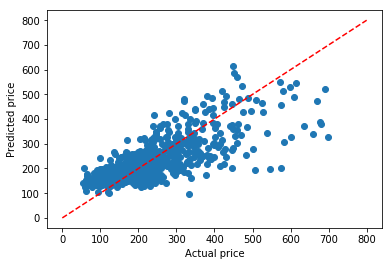

In [11]:
plt.scatter(price, predicted)
plt.plot((0,800), (0,800), ls="--", c='r')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.show()

In [3]:
def house_sales_data():
    # 774 House sales in Sacramento area.
    # Column 1: region (1--4) based on 5-digit ZIP code (see Table 13.4.)
    # Column 2: number of bedrooms.
    # Column 3: number of bathrooms.
    # Column 4: house area in square feet.
    # Column 5: 1 if a condo, 0 otherwise.
    # Column 6: selling price in dollars.
    """
        house_sales_data()
    Returns a dictionary `D` with the Sacramento house sales data
    used in section 2.3 and chapter 13.  
    The 6 items in the dictionary are vectors of length 774, with data for 
    774 house sales.
    * `D["price"]`:    selling price in 1000 dollars
    * `D["area"]`:     area in 1000 square feet
    * `D["beds"]`:     number of bedrooms
    * `D["baths"]`:    number of bathrooms
    * `D["condo"]`:    1 if a condo, 0 otherwise 
    * `D["location"]`: an integer between 1 and 4 indicating the location.
    """
    import numpy as np
    X = np.array([[ 2,   2,   2,    941,   1,     94905],
         [ 2,   3,   2,   1146,   0,     98937],
         [ 2,   3,   2,    909,   0,    100309],
         [ 3,   3,   2,   1289,   0,    106250],
         [ 3,   3,   1,   1020,   0,    107502],
         [ 2,   2,   2,   1022,   0,    108750],
         [ 2,   2,   2,   1134,   1,    110700],
         [ 2,   2,   1,    844,   0,    113263],
         [ 2,   2,   1,    795,   1,    116250],
         [ 2,   2,   1,    588,   0,    120000],
         [ 2,   3,   2,   1356,   0,    121630],
         [ 2,   3,   2,   1118,   0,    122000],
         [ 3,   4,   2,   1329,   0,    122682],
         [ 2,   4,   2,   1240,   0,    123000],
         [ 2,   3,   2,   1601,   0,    124100],
         [ 2,   3,   2,    901,   0,    125000],
         [ 2,   3,   2,   1088,   0,    126640],
         [ 3,   3,   1,    963,   0,    127281],
         [ 3,   3,   2,   1119,   0,    129000],
         [ 2,   4,   2,   1380,   0,    131200],
         [ 3,   3,   2,   1248,   0,    132000],
         [ 3,   2,   2,   1039,   1,    133000],
         [ 2,   3,   2,   1152,   0,    134555],
         [ 2,   3,   2,   1380,   0,    136500],
         [ 2,   3,   2,   1116,   0,    138750],
         [ 3,   2,   2,   1039,   1,    141000],
         [ 3,   3,   2,   1418,   0,    146250],
         [ 2,   3,   2,   1082,   0,    147308],
         [ 3,   4,   2,   1472,   0,    148750],
         [ 3,   4,   2,   1146,   0,    149593],
         [ 2,   1,   1,    760,   1,    150000],
         [ 2,   2,   2,   1304,   1,    152000],
         [ 3,   3,   2,   1207,   0,    154000],
         [ 3,   3,   2,   1056,   0,    156896],
         [ 2,   2,   2,   1043,   0,    161250],
         [ 2,   4,   2,   1587,   0,    161500],
         [ 2,   4,   1,   1120,   0,    164000],
         [ 3,   4,   2,   1580,   0,    165000],
         [ 3,   4,   1,   1955,   0,    166357],
         [ 2,   4,   2,   1656,   0,    166357],
         [ 3,   3,   2,   1477,   0,    168000],
         [ 3,   3,   2,   1188,   0,    170000],
         [ 3,   4,   2,   1590,   0,    173000],
         [ 3,   3,   2,   1463,   0,    174250],
         [ 3,   4,   2,   1714,   0,    174313],
         [ 3,   3,   2,   1185,   0,    178480],
         [ 3,   3,   2,   1406,   0,    178760],
         [ 3,   3,   2,   1172,   0,    181000],
         [ 2,   3,   1,   1152,   0,    181872],
         [ 3,   4,   3,   1851,   0,    182587],
         [ 2,   3,   2,   1215,   0,    182716],
         [ 3,   3,   2,   1130,   0,    182750],
         [ 2,   4,   2,   1603,   0,    183200],
         [ 3,   3,   1,   1479,   0,    188741],
         [ 3,   3,   2,   1420,   0,    189000],
         [ 3,   3,   2,   1280,   0,    192067],
         [ 3,   3,   2,   1586,   0,    194000],
         [ 2,   3,   2,   1362,   0,    194818],
         [ 3,   3,   2,   1266,   0,    198000],
         [ 3,   4,   2,   1715,   0,    199500],
         [ 4,   3,   2,   1820,   0,    200000],
         [ 2,   3,   1,    936,   0,    200000],
         [ 2,   3,   2,   1511,   0,    208000],
         [ 3,   4,   2,   1590,   0,    212864],
         [ 3,   4,   2,   1596,   0,    221000],
         [ 2,   2,   2,   1341,   0,    221000],
         [ 3,   5,   3,   2136,   0,    223058],
         [ 3,   4,   2,   1616,   0,    227887],
         [ 3,   3,   2,   1478,   0,    231477],
         [ 2,   3,   2,   1287,   0,    234697],
         [ 2,   4,   2,   1277,   0,    235000],
         [ 2,   4,   2,   1448,   0,    236000],
         [ 3,   4,   3,   2235,   0,    236685],
         [ 2,   3,   2,   2093,   0,    237800],
         [ 2,   3,   2,   1193,   0,    240122],
         [ 3,   3,   2,   2163,   0,    242638],
         [ 3,   3,   2,   1269,   0,    244000],
         [ 3,   3,   1,    958,   0,    244960],
         [ 3,   5,   3,   2508,   0,    245918],
         [ 2,   3,   2,   1305,   0,    250000],
         [ 3,   4,   2,   1591,   0,    250000],
         [ 2,   2,   2,   1326,   1,    250134],
         [ 3,   3,   2,   1843,   0,    254200],
         [ 2,   4,   2,   1921,   0,    254200],
         [ 3,   5,   3,   2790,   0,    258000],
         [ 2,   3,   2,   1541,   0,    260000],
         [ 3,   3,   1,   1018,   0,    260014],
         [ 2,   3,   2,   1672,   1,    265000],
         [ 3,   3,   1,    975,   0,    271742],
         [ 3,   4,   3,   2372,   0,    273750],
         [ 3,   3,   2,   1446,   0,    275086],
         [ 3,   4,   3,   3009,   0,    280987],
         [ 3,   4,   2,   2056,   0,    285000],
         [ 3,   4,   2,   1993,   0,    287417],
         [ 3,   3,   2,   1857,   0,    291000],
         [ 1,   2,   1,   1126,   0,    292024],
         [ 3,   5,   3,   2494,   0,    297000],
         [ 3,   3,   2,   1843,   0,    298000], 
         [ 2,   2,   2,   1520,   0,    299000],
         [ 2,   5,   3,   2800,   0,    304037],
         [ 3,   4,   2,   2309,   0,    311000],
         [ 2,   5,   3,   2367,   0,    315537],
         [ 2,   5,   4,   3516,   0,    320000],
         [ 3,   4,   3,   1914,   0,    328360],
         [ 2,   2,   1,   1690,   0,    334150],
         [ 3,   3,   3,   2725,   0,    335750],
         [ 3,   4,   3,   2354,   0,    335750],
         [ 4,   3,   2,   2185,   0,    344250],
         [ 3,   4,   2,   1801,   0,    346210],
         [ 3,   3,   3,   1961,   0,    347029],
         [ 3,   4,   2,   3134,   0,    347650],
         [ 3,   4,   3,   1915,   0,    351300],
         [ 2,   4,   3,   2734,   0,    370500],
         [ 3,   3,   2,   2110,   0,    372000],
         [ 3,   5,   3,   3164,   0,    375000],
         [ 2,   5,   3,   3599,   0,    381300],
         [ 3,   4,   2,   2054,   0,    381942],
         [ 2,   4,   2,   1830,   0,    387731],
         [ 1,   3,   3,   1627,   0,    391000],
         [ 3,   4,   3,   3440,   0,    394470],
         [ 4,   3,   2,   2846,   0,    395000],
         [ 3,   4,   3,   2359,   0,    400186],
         [ 3,   3,   3,   2052,   0,    415000],
         [ 3,   5,   3,   3433,   0,    425000],
         [ 2,   5,   3,   3615,   0,    430000],
         [ 4,   5,   3,   2687,   0,    460000],
         [ 3,   4,   3,   2724,   0,    461000],
         [ 3,   4,   3,   3440,   0,    489332],
         [ 3,   5,   4,   3508,   0,    510000],
         [ 4,   4,   2,   2462,   0,    539000],
         [ 2,   3,   3,   2325,   0,    660000],
         [ 2,   2,   1,    795,   1,     69000],
         [ 1,   4,   2,   1099,   0,     70000],
         [ 3,   2,   1,    840,   1,     71000],
         [ 2,   2,   1,    800,   0,     78000],
         [ 3,   2,   1,    746,   0,     78400],
         [ 3,   3,   1,   1067,   0,     80000],
         [ 2,   4,   2,   1316,   0,     89000],
         [ 2,   3,   1,   1337,   0,     90000],
         [ 3,   2,   1,    868,   0,     90000],
         [ 3,   3,   1,    924,   0,     92000],
         [ 3,   2,   1,    610,   0,     93675],
         [ 2,   2,   1,   1220,   0,     98000],
         [ 3,   1,   1,    722,   1,     98000],
         [ 2,   3,   1,   1643,   0,     99000],
         [ 3,   1,   1,    722,   1,    100000],
         [ 3,   3,   1,   1080,   0,    106716],
         [ 3,   3,   1,   1039,   0,    111000],
         [ 2,   3,   1,   1051,   0,    111000],
         [ 2,   2,   2,    967,   0,    114800],
         [ 2,   3,   1,   1098,   0,    120108],
         [ 3,   3,   1,   1050,   0,    123225],
         [ 2,   3,   2,   1110,   0,    123750],
         [ 2,   3,   1,    888,   0,    125000],
         [ 3,   3,   2,   1120,   0,    125000],
         [ 2,   3,   2,   1080,   0,    126000],
         [ 2,   3,   1,    957,   0,    129000],
         [ 2,   2,   1,    952,   0,    134000],
         [ 2,   3,   2,   1211,   0,    135000],
         [ 2,   3,   2,   1264,   0,    135500],
         [ 2,   3,   1,   1080,   0,    140000],
         [ 3,   3,   2,   1266,   0,    140000],
         [ 2,   2,   2,    994,   1,    142500],
         [ 2,   3,   2,   1202,   0,    143500],
         [ 3,   2,   1,    722,   0,    145000],
         [ 3,   4,   2,   1448,   0,    145000],
         [ 3,   3,   2,   1188,   0,    145000],
         [ 2,   4,   2,   1183,   0,    146000],
         [ 3,   3,   1,   1320,   0,    148500],
         [ 3,   3,   2,   1117,   0,    149000],
         [ 3,   3,   2,   1364,   0,    150000],
         [ 3,   4,   2,   1310,   0,    150000],
         [ 3,   2,   2,   1006,   0,    152000],
         [ 2,   3,   2,   1104,   0,    156000],
         [ 2,   2,   1,    810,   0,    156000],
         [ 3,   2,   2,   1123,   0,    156000],
         [ 2,   2,   1,    904,   0,    157788],
         [ 2,   3,   2,   1156,   0,    161653],
         [ 3,   2,   1,   1321,   0,    161829],
         [ 2,   3,   2,   1392,   0,    165000],
         [ 3,   3,   2,   1439,   0,    168000],
         [ 2,   3,   2,   1159,   0,    169000],
         [ 2,   3,   2,   1671,   0,    175000],
         [ 3,   3,   2,   1740,   0,    176250],
         [ 3,   3,   2,   1265,   0,    179000],
         [ 2,   2,   2,   1007,   0,    180000],
         [ 3,   3,   2,   1716,   0,    180400],
         [ 3,   4,   2,   1685,   0,    182000],
         [ 2,   4,   2,   1829,   0,    184500],
         [ 3,   3,   2,   1555,   0,    185000],
         [ 2,   4,   2,   1120,   0,    189000],
         [ 2,   3,   2,   1137,   0,    194000],
         [ 3,   3,   1,   1174,   0,    195000],
         [ 2,   3,   2,   1393,   0,    200000],
         [ 3,   3,   2,   1289,   0,    205000],
         [ 2,   4,   2,   1799,   0,    205000],
         [ 3,   4,   3,   1953,   0,    205000],
         [ 3,   2,   1,    723,   0,    207000],
         [ 2,   4,   2,   1578,   0,    215000],
         [ 2,   3,   2,   1317,   0,    215000],
         [ 3,   3,   1,   1360,   0,    222381],
         [ 2,   3,   2,   1522,   0,    225000],
         [ 2,   4,   2,   1751,   0,    225000],
         [ 3,   3,   2,   1465,   0,    225000],
         [ 3,   4,   2,   1605,   0,    228000],
         [ 2,   4,   2,   1475,   0,    229665],
         [ 4,   3,   1,   1216,   0,    230000],
         [ 2,   2,   2,   1315,   0,    230000],
         [ 3,   3,   2,   1567,   0,    230000],
         [ 2,   3,   2,   1776,   0,    234000],
         [ 2,   3,   2,   2187,   0,    235000],
         [ 3,   3,   1,   1291,   0,    236250],
         [ 2,   3,   2,   1503,   0,    245000],
         [ 3,   4,   3,   2491,   0,    245000],
         [ 1,   2,   1,   1269,   0,    245000],
         [ 2,   3,   2,   1176,   0,    250000],
         [ 2,   4,   2,   1456,   0,    250000],
         [ 4,   3,   2,   1498,   0,    250000],
         [ 2,   3,   2,   1574,   0,    255000],
         [ 3,   3,   2,   2170,   0,    257729],
         [ 3,   4,   2,   1595,   0,    260000],
         [ 2,   3,   2,   1567,   0,    261000],
         [ 3,   4,   2,   1253,   0,    264469],
         [ 2,   4,   3,   1768,   0,    265000],
         [ 2,   4,   3,   2030,   0,    270000],
         [ 2,   3,   2,   1531,   0,    270000],
         [ 3,   4,   3,   1653,   0,    275000],
         [ 3,   4,   2,   2056,   0,    275000],
         [ 3,   4,   3,   2494,   0,    280000],
         [ 2,   3,   2,   1450,   0,    286013],
         [ 2,   4,   2,   2169,   0,    292000],
         [ 4,   3,   2,   1440,   0,    292000],
         [ 2,   3,   2,   1527,   0,    293993],
         [ 4,   3,   2,   1401,   0,    294000],
         [ 2,   3,   2,   1411,   0,    296769],
         [ 2,   3,   1,   1284,   0,    300000],
         [ 3,   4,   3,   2307,   0,    300000],
         [ 2,   4,   2,   1910,   0,    300500],
         [ 2,   3,   2,   1981,   0,    305000],
         [ 3,   4,   2,   2205,   0,    319789],
         [ 4,   2,   2,   1449,   0,    330000],
         [ 4,   3,   2,   1258,   0,    330000],
         [ 3,   3,   2,   2575,   0,    331000],
         [ 3,   2,   1,    539,   0,    334000],
         [ 2,   4,   3,   2208,   0,    336000],
         [ 1,   3,   1,   1108,   0,    339000],
         [ 4,   4,   2,   1595,   0,    339000],
         [ 3,   4,   2,   2159,   0,    345000],
         [ 4,   3,   2,   1838,   0,    356000],
         [ 3,   4,   2,   1900,   0,    361745],
         [ 1,   4,   2,   1718,   0,    361948],
         [ 3,   5,   3,   3389,   0,    370000],
         [ 3,   5,   4,   3260,   0,    385000],
         [ 4,   3,   2,   2016,   0,    399000],
         [ 4,   4,   2,   2607,   0,    402000],
         [ 3,   4,   3,   2724,   0,    406026],
         [ 3,   5,   4,   3746,   0,    420000],
         [ 2,   4,   2,   3192,   0,    425000],
         [ 1,   2,   1,   1247,   0,    445000],
         [ 4,   4,   2,   2581,   0,    450000],
         [ 2,   3,   1,   2068,   0,    460000],
         [ 3,   4,   3,   3992,   0,    460000],
         [ 2,   4,   4,   3397,   0,    465000],
         [ 2,   5,   3,   3881,   0,    471750],
         [ 2,   2,   2,   1598,   0,    484000],
         [ 3,   4,   3,   3070,   0,    495000],
         [ 3,   5,   3,   3984,   0,    572500],
         [ 2,   4,   2,   2222,   0,    582000],
         [ 4,   4,   3,   3838,   0,    613401],
         [ 2,   5,   5,   2846,   0,    680000],
         [ 1,   5,   2,   2484,   0,    699000],
         [ 2,   3,   1,    970,   0,     61500],
         [ 1,   2,   1,    623,   0,     62050],
         [ 3,   2,   1,    932,   0,     65000],
         [ 2,   2,   1,    796,   0,     65000],
         [ 3,   2,   1,    834,   0,     68000],
         [ 3,   2,   1,    834,   0,     68000],
         [ 2,   2,   1,    924,   1,     77000],
         [ 2,   2,   1,    795,   1,     82732],
         [ 2,   3,   1,   1250,   0,     84000],
         [ 3,   2,   1,    984,   0,     84675],
         [ 3,   3,   1,   1013,   0,     85000],
         [ 3,   3,   1,   1012,   0,     90000],
         [ 3,   2,   1,    795,   1,     90000],
         [ 2,   2,   2,    918,   0,     91000],
         [ 2,   3,   1,   1082,   0,     95000],
         [ 2,   2,   1,    964,   0,     97500],
         [ 3,   1,   1,    625,   1,    100000],
         [ 2,   2,   1,    888,   0,    101000],
         [ 2,   4,   2,   1120,   0,    102750],
         [ 2,   3,   1,   1331,   0,    112500],
         [ 2,   3,   1,   1014,   0,    113000],
         [ 3,   4,   2,   1448,   0,    114000],
         [ 2,   3,   1,    966,   0,    114000],
         [ 3,   2,   1,    779,   0,    114750],
         [ 2,   2,   2,    836,   1,    115000],
         [ 4,   2,   2,   1100,   1,    115000],
         [ 3,   3,   1,   1174,   0,    116100],
         [ 2,   3,   2,   1207,   0,    119250],
         [ 3,   2,   1,    804,   0,    120000],
         [ 2,   2,   2,    958,   1,    120000],
         [ 3,   3,   2,   1366,   0,    120108],
         [ 3,   2,   2,    901,   0,    121500],
         [ 2,   3,   1,    696,   0,    121725],
         [ 3,   3,   2,   1080,   0,    122000],
         [ 3,   3,   2,   1104,   0,    123000],
         [ 2,   2,   1,    972,   0,    125000],
         [ 2,   4,   2,   1390,   0,    125573],
         [ 2,   4,   2,   1354,   0,    126714],
         [ 3,   2,   1,    795,   1,    126960],
         [ 4,   2,   1,    780,   1,    127000],
         [ 3,   4,   2,   1587,   0,    127500],
         [ 2,   3,   2,   1209,   0,    130000],
         [ 3,   2,   1,   1139,   0,    133105],
         [ 2,   2,   2,   1690,   0,    136500],
         [ 2,   3,   2,   1245,   1,    139500],
         [ 2,   3,   2,   1416,   0,    140000],
         [ 3,   3,   2,   1300,   0,    140800],
         [ 3,   3,   2,   1120,   0,    145000],
         [ 3,   4,   2,   1590,   0,    147000],
         [ 3,   3,   2,   1407,   0,    149600],
         [ 3,   5,   2,   1516,   0,    150000],
         [ 3,   3,   2,   1646,   0,    150000],
         [ 3,   3,   2,   1676,   0,    155000],
         [ 2,   3,   2,   1370,   0,    155435],
         [ 2,   3,   2,   1370,   0,    155500],
         [ 2,   4,   2,   1351,   0,    158000],
         [ 2,   3,   2,   1152,   0,    158000],
         [ 3,   3,   2,   1452,   0,    160000],
         [ 4,   2,   1,    990,   0,    160000],
         [ 2,   2,   2,   1162,   0,    164000],
         [ 2,   3,   2,   1182,   0,    164000],
         [ 3,   2,   2,   1112,   0,    165000],
         [ 3,   3,   2,   1100,   0,    167000],
         [ 2,   4,   2,   1280,   0,    167293],
         [ 2,   4,   2,   1280,   0,    167293],
         [ 3,   3,   1,   1039,   0,    168000],
         [ 2,   3,   2,   1159,   0,    170000],
         [ 2,   4,   2,   1917,   0,    170000],
         [ 2,   3,   2,   1520,   0,    170000],
         [ 3,   3,   2,   1204,   0,    174000],
         [ 2,   3,   2,   1120,   0,    178000],
         [ 3,   3,   2,   1436,   0,    180000],
         [ 3,   3,   2,   1451,   0,    180000],
         [ 3,   4,   2,   1638,   0,    180000],
         [ 2,   2,   2,   1000,   1,    182000],
         [ 4,   3,   1,   1152,   0,    188325],
         [ 4,   3,   2,   1154,   0,    191500],
         [ 2,   3,   2,   1353,   0,    192000],
         [ 2,   3,   2,   1329,   0,    192700],
         [ 3,   3,   1,   1356,   0,    195000],
         [ 2,   3,   2,   1505,   0,    197654],
         [ 2,   3,   1,   1009,   0,    198000],
         [ 3,   3,   2,   1144,   0,    200345],
         [ 2,   2,   1,    930,   0,    203000],
         [ 2,   4,   2,   1766,   0,    207000],
         [ 3,   4,   3,   1940,   0,    208000],
         [ 3,   4,   2,   1776,   0,    210000],
         [ 2,   3,   1,   1258,   0,    212000],
         [ 3,   4,   2,   1872,   0,    213675],
         [ 3,   2,   2,   1112,   0,    213697],
         [ 2,   4,   2,   1856,   0,    215000],
         [ 1,   4,   3,   1939,   0,    215000],
         [ 4,   3,   1,    998,   0,    215100],
         [ 4,   3,   2,   1758,   0,    217500],
         [ 2,   3,   2,   2142,   0,    218000],
         [ 3,   2,   1,    950,   0,    220000],
         [ 3,   4,   3,   1739,   0,    221000],
         [ 3,   3,   2,   1516,   0,    222900],
         [ 2,   3,   1,    988,   0,    223139],
         [ 3,   4,   2,   1555,   0,    225500],
         [ 3,   3,   2,   1212,   0,    228327],
         [ 2,   4,   2,   1871,   0,    230000],
         [ 3,   3,   2,   1302,   0,    230000],
         [ 2,   2,   1,    756,   1,    230522],
         [ 2,   4,   3,   2026,   0,    231200],
         [ 3,   3,   2,   1375,   0,    232000],
         [ 2,   2,   2,   1250,   1,    232500],
         [ 3,   3,   1,   1058,   0,    233641],
         [ 2,   3,   2,   1187,   0,    234000],
         [ 3,   2,   2,   1324,   0,    234500],
         [ 3,   4,   3,   1936,   0,    235000],
         [ 4,   3,   2,   1427,   0,    236073],
         [ 2,   3,   2,   1678,   1,    238000],
         [ 3,   4,   2,   1798,   0,    238861],
         [ 2,   4,   3,   2652,   0,    239700],
         [ 3,   4,   2,   1816,   0,    240000],
         [ 2,   5,   3,   3076,   0,    240000],
         [ 3,   4,   2,   1844,   0,    241000],
         [ 3,   3,   2,   1306,   0,    245000],
         [ 2,   4,   3,   2447,   0,    246000],
         [ 3,   4,   2,   1176,   0,    247234],
         [ 2,   4,   2,   1182,   0,    247480],
         [ 2,   3,   1,   1160,   0,    249862],
         [ 2,   3,   2,   1424,   0,    251000],
         [ 2,   4,   2,   1574,   0,    252155],
         [ 2,   3,   2,   1830,   0,    254172],
         [ 3,   4,   2,   1724,   0,    258000],
         [ 4,   2,   2,   1255,   1,    260000],
         [ 2,   4,   3,   2175,   0,    261000],
         [ 2,   4,   2,   1904,   0,    261000],
         [ 4,   4,   2,   1808,   0,    262500],
         [ 2,   4,   2,   2711,   0,    266000],
         [ 2,   3,   1,   1713,   0,    266000],
         [ 3,   3,   2,   1457,   0,    270000],
         [ 3,   4,   3,   2724,   0,    274425],
         [ 3,   3,   2,   1468,   0,    275336],
         [ 2,   4,   3,   2550,   0,    277980],
         [ 3,   4,   2,   1928,   0,    280000],
         [ 1,   3,   3,   1922,   0,    284686],
         [ 2,   3,   2,   1343,   0,    284893],
         [ 4,   3,   2,   1510,   0,    285000],
         [ 2,   4,   2,   1559,   0,    285000],
         [ 3,   5,   3,   2992,   0,    295000],
         [ 3,   4,   2,   2109,   0,    296000],
         [ 2,   4,   2,   1524,   0,    296056],
         [ 3,   3,   2,   1248,   0,    297359],
         [ 3,   4,   2,   1876,   0,    299940],
         [ 2,   4,   3,   1851,   0,    305000],
         [ 2,   4,   2,   2218,   0,    311328],
         [ 3,   3,   2,   1394,   0,    313138],
         [ 3,   3,   2,   1410,   0,    316630],
         [ 3,   5,   3,   3468,   0,    320000],
         [ 2,   5,   3,   2346,   0,    320000],
         [ 2,   5,   3,   2347,   0,    325000],
         [ 2,   4,   2,   1659,   0,    328578],
         [ 3,   3,   3,   2442,   0,    331000],
         [ 2,   4,   2,   2155,   0,    340000],
         [ 3,   3,   2,   1810,   0,    345746],
         [ 3,   4,   2,   2789,   0,    351000],
         [ 3,   4,   2,   1606,   0,    353767],
         [ 2,   4,   2,   2166,   0,    356035],
         [ 2,   4,   2,   1871,   0,    360552],
         [ 2,   3,   2,   1800,   0,    362305],
         [ 1,   3,   1,   1683,   0,    365000],
         [ 4,   2,   2,   1596,   0,    370000],
         [ 3,   3,   2,   1179,   0,    378000],
         [ 1,   3,   1,   1639,   0,    388000],
         [ 2,   5,   3,   3281,   0,    395100],
         [ 1,   3,   2,   1697,   0,    400000],
         [ 2,   4,   3,   2085,   0,    408431],
         [ 4,   4,   3,   1939,   0,    423000],
         [ 1,   2,   3,   1788,   0,    427500],
         [ 4,   3,   2,   1691,   0,    430922],
         [ 3,   4,   2,   2002,   0,    445000],
         [ 3,   4,   4,   4303,   0,    450000],
         [ 2,   5,   3,   4246,   0,    452000],
         [ 4,   3,   2,   2274,   0,    470000],
         [ 2,   4,   4,   3056,   0,    475000],
         [ 3,   3,   3,   2503,   0,    484500],
         [ 4,   3,   2,   1905,   0,    500000],
         [ 4,   3,   2,   1320,   0,    506688],
         [ 2,   4,   2,   3037,   0,    528000],
         [ 3,   5,   2,   3741,   0,    579093],
         [ 4,   4,   3,   2660,   0,    636000],
         [ 2,   4,   3,   3357,   0,    668365],
         [ 4,   5,   3,   2896,   0,    676200],
         [ 3,   5,   3,   3788,   0,    691659],
         [ 3,   2,   1,    838,   0,     55422],
         [ 2,   2,   1,    904,   0,     63000],
         [ 2,   2,   1,   1032,   0,     65000],
         [ 2,   2,   1,    904,   0,     65000],
         [ 1,   2,   1,   1080,   0,     65000],
         [ 3,   2,   2,    990,   0,     66500],
         [ 2,   2,   1,    900,   0,     71000],
         [ 3,   2,   1,    861,   0,     75000],
         [ 3,   2,   1,    906,   1,     77000],
         [ 2,   2,   1,   1011,   0,     85000],
         [ 3,   3,   2,   1089,   0,     95625],
         [ 2,   2,   1,    832,   0,     96140],
         [ 3,   2,   1,    800,   1,    104250],
         [ 2,   4,   2,   1292,   0,    105000],
         [ 3,   2,   1,    810,   0,    108000],
         [ 2,   4,   2,   1064,   0,    109000],
         [ 2,   2,   1,    911,   0,    115000],
         [ 2,   1,   1,    846,   1,    115000],
         [ 2,   3,   2,   1320,   0,    115500],
         [ 2,   3,   2,   1410,   0,    115620],
         [ 2,   3,   2,   1115,   0,    116000],
         [ 3,   3,   2,   1169,   0,    122000],
         [ 3,   3,   2,   1164,   0,    122500],
         [ 3,   4,   2,   1341,   0,    123000],
         [ 2,   3,   2,   1219,   0,    124000],
         [ 2,   4,   2,   1127,   0,    124000],
         [ 2,   3,   2,   1272,   0,    124413],
         [ 3,   4,   2,   1253,   0,    125000],
         [ 3,   3,   2,   1120,   0,    130000],
         [ 2,   2,   2,   1118,   0,    131750],
         [ 2,   4,   3,   1890,   0,    137721],
         [ 2,   3,   2,   1260,   0,    137760],
         [ 3,   3,   2,   1400,   0,    138000],
         [ 2,   3,   1,   1264,   0,    140000],
         [ 3,   3,   1,   1060,   0,    145000],
         [ 3,   2,   2,   1132,   0,    145000],
         [ 3,   3,   2,   1466,   0,    150000],
         [ 2,   3,   2,   1092,   0,    150000],
         [ 3,   4,   2,   1628,   0,    151000],
         [ 2,   3,   2,    960,   0,    155000],
         [ 2,   3,   2,   1075,   0,    155800],
         [ 3,   3,   2,   1428,   0,    156142],
         [ 3,   4,   2,   1358,   0,    158000],
         [ 2,   3,   2,   1410,   0,    160000],
         [ 2,   3,   2,   1711,   0,    161500],
         [ 3,   4,   2,   1483,   0,    161600],
         [ 3,   3,   2,   1140,   0,    162000],
         [ 3,   4,   2,   1549,   0,    165000],
         [ 3,   3,   2,   1410,   0,    165000],
         [ 3,   3,   2,   1240,   0,    167293],
         [ 2,   5,   2,   1712,   0,    168000],
         [ 3,   4,   2,   1580,   0,    168000],
         [ 2,   3,   2,   1669,   0,    168750],
         [ 3,   3,   1,   1029,   0,    168750],
         [ 2,   3,   1,   1103,   0,    170000],
         [ 3,   3,   2,   2161,   0,    170250],
         [ 3,   3,   2,   1650,   0,    173000],
         [ 3,   3,   2,   1200,   0,    176095],
         [ 2,   3,   2,   1170,   0,    176250],
         [ 2,   3,   2,   1199,   0,    178000],
         [ 3,   4,   2,   1695,   0,    179000],
         [ 2,   3,   2,   1157,   0,    180000],
         [ 2,   3,   2,   1410,   0,    180000],
         [ 4,   3,   2,   1174,   0,    180000],
         [ 3,   3,   2,   1593,   0,    181000],
         [ 2,   3,   2,   1093,   0,    182000],
         [ 4,   3,   2,   1770,   0,    182587],
         [ 3,   4,   2,   1436,   0,    185074],
         [ 3,   3,   2,   1124,   0,    185833],
         [ 3,   4,   2,   1139,   0,    186785],
         [ 3,   3,   2,   1638,   0,    187000],
         [ 2,   3,   2,   1328,   0,    188335],
         [ 3,   3,   2,   1273,   0,    190000],
         [ 2,   3,   1,   1082,   0,    190000],
         [ 2,   4,   2,   1578,   0,    190000],
         [ 4,   2,   1,    796,   0,    190000],
         [ 3,   3,   2,   1386,   0,    191250],
         [ 2,   3,   2,   1452,   0,    193000],
         [ 3,   3,   2,   1513,   0,    193500],
         [ 2,   4,   2,   1578,   0,    195000],
         [ 2,   4,   3,   1736,   0,    195000],
         [ 2,   3,   1,   1473,   0,    195000],
         [ 3,   3,   1,   1150,   0,    198000],
         [ 2,   3,   2,   1127,   0,    199900],
         [ 2,   3,   1,   1144,   0,    200000],
         [ 2,   3,   1,    972,   0,    201000],
         [ 3,   4,   2,   2306,   0,    204918],
         [ 2,   3,   2,   1479,   0,    205000],
         [ 2,   3,   2,   1430,   0,    205878],
         [ 3,   4,   2,   1800,   0,    207000],
         [ 2,   4,   2,   1953,   0,    207744],
         [ 2,   3,   2,   1120,   0,    209000],
         [ 2,   3,   2,   1232,   0,    210000],
         [ 2,   1,   1,    984,   1,    210944],
         [ 3,   4,   2,   2329,   0,    213750],
         [ 3,   3,   2,   1351,   0,    215000],
         [ 4,   4,   1,   1376,   0,    215000],
         [ 2,   4,   2,   1566,   0,    220000],
         [ 1,   2,   1,   1115,   0,    220000],
         [ 1,   2,   1,   1032,   0,    220000],
         [ 2,   4,   2,   1419,   0,    220000],
         [ 3,   3,   2,   1261,   0,    220000],
         [ 2,   2,   2,   1637,   0,    220702],
         [ 3,   3,   2,   1338,   0,    222000],
         [ 3,   5,   2,   2254,   0,    222750],
         [ 2,   3,   2,   1441,   0,    225000],
         [ 2,   4,   2,   1991,   0,    225000],
         [ 3,   4,   3,   2126,   0,    228750],
         [ 3,   3,   2,   1094,   0,    229000],
         [ 4,   3,   2,   1462,   0,    230095],
         [ 2,   5,   3,   2258,   0,    232500],
         [ 2,   3,   2,   1074,   0,    233000],
         [ 3,   4,   2,   2111,   0,    233500],
         [ 2,   3,   2,   1686,   0,    239000],
         [ 2,   4,   3,   1915,   0,    240000],
         [ 3,   4,   2,   2367,   0,    240000],
         [ 3,   3,   2,   1962,   0,    240971],
         [ 2,   2,   2,   1406,   0,    242000],
         [ 3,   3,   2,   1789,   0,    243450],
         [ 2,   4,   2,   1876,   0,    243500],
         [ 2,   3,   2,   1235,   0,    246544],
         [ 2,   4,   2,   2504,   0,    246750],
         [ 2,   3,   2,   1676,   0,    247000],
         [ 2,   3,   2,   1367,   0,    249000],
         [ 3,   4,   3,   1899,   0,    249000],
         [ 3,   3,   2,   1636,   0,    250000],
         [ 2,   3,   2,   1828,   0,    250000],
         [ 3,   4,   2,   1438,   0,    252000],
         [ 3,   3,   2,   1451,   0,    255000],
         [ 2,   3,   1,   1520,   0,    255000],
         [ 4,   3,   2,   1506,   0,    255000],
         [ 2,   4,   2,   2605,   0,    257200],
         [ 2,   3,   2,   1196,   0,    260000],
         [ 4,   3,   2,   1621,   0,    260000],
         [ 2,   3,   2,   1811,   0,    263500],
         [ 3,   3,   2,   1540,   0,    266510],
         [ 3,   3,   2,   1543,   0,    275000],
         [ 2,   5,   3,   2494,   0,    276000],
         [ 4,   3,   2,   1650,   0,    276500],
         [ 3,   4,   3,   2214,   0,    278000],
         [ 2,   5,   3,   2280,   0,    279000],
         [ 2,   3,   2,   1443,   0,    280000],
         [ 2,   4,   2,   1582,   0,    280000],
         [ 3,   3,   2,   1857,   0,    285000],
         [ 3,   3,   2,   1735,   0,    288000],
         [ 3,   4,   3,   2096,   0,    289000],
         [ 2,   3,   2,   1720,   0,    290000],
         [ 2,   4,   2,   2160,   0,    290000],
         [ 2,   4,   2,   1382,   0,    293996],
         [ 3,   4,   2,   1721,   0,    294173],
         [ 4,   4,   2,   1328,   0,    295000],
         [ 3,   4,   2,   1982,   0,    298000],
         [ 1,   2,   1,   1144,   0,    299000],
         [ 2,   2,   2,   1623,   0,    300000],
         [ 4,   3,   2,   1457,   0,    300000],
         [ 3,   6,   3,   2555,   0,    300000],
         [ 4,   3,   2,   1577,   0,    300567],
         [ 3,   5,   3,   2592,   0,    303000],
         [ 2,   3,   2,   1401,   0,    305000],
         [ 2,   3,   2,   1502,   0,    310000],
         [ 4,   3,   2,   1327,   0,    310000],
         [ 4,   4,   3,   1800,   0,    310000],
         [ 3,   4,   2,   2169,   0,    311518],
         [ 4,   5,   3,   2457,   0,    312000],
         [ 2,   4,   2,   2004,   0,    315000],
         [ 4,   4,   3,   2212,   0,    315000],
         [ 2,   5,   3,   3134,   0,    315000],
         [ 2,   3,   2,   1360,   0,    315000],
         [ 3,   3,   2,   1276,   0,    320000],
         [ 2,   4,   3,   2962,   0,    322000],
         [ 4,   4,   2,   1888,   0,    325000],
         [ 3,   3,   2,   1548,   0,    328370],
         [ 2,   4,   3,   2109,   0,    330000],
         [ 2,   4,   2,   2484,   0,    331200],
         [ 2,   4,   3,   2258,   0,    332000],
         [ 2,   3,   3,   2212,   0,    334000],
         [ 2,   3,   2,   1616,   0,    335000],
         [ 2,   4,   2,   2372,   0,    341000],
         [ 4,   5,   3,   2606,   0,    346375],
         [ 3,   5,   3,   2877,   0,    349000],
         [ 2,   3,   2,   2960,   0,    350000],
         [ 4,   3,   2,   2172,   0,    350000],
         [ 4,   3,   2,   2100,   1,    350000],
         [ 3,   3,   2,   1795,   0,    351000],
         [ 4,   4,   2,   2295,   0,    360000],
         [ 4,   4,   3,   2577,   0,    367463],
         [ 3,   3,   1,   1727,   0,    380000],
         [ 3,   3,   2,   1485,   0,    380578],
         [ 2,   3,   2,   1655,   0,    386222],
         [ 4,   3,   2,   2049,   0,    395500],
         [ 3,   5,   3,   2875,   0,    397000],
         [ 4,   4,   2,   2199,   0,    400000],
         [ 1,   2,   1,   1304,   0,    413500],
         [ 2,   3,   2,   2334,   0,    415000],
         [ 4,   4,   3,   2278,   0,    420454],
         [ 1,   3,   1,   1493,   0,    425000],
         [ 4,   5,   3,   2787,   0,    441000],
         [ 3,   5,   3,   2824,   0,    445000],
         [ 4,   4,   3,   3261,   0,    446000],
         [ 2,   4,   2,   2053,   0,    450000],
         [ 4,   4,   3,   2379,   0,    455000],
         [ 2,   3,   2,   3173,   0,    525000],
         [ 2,   3,   1,   1348,   0,    545000],
         [ 1,   2,   1,   1252,   0,    575000],
         [ 4,   4,   3,   3229,   0,    575000],
         [ 3,   5,   4,   3863,   0,    598695],
         [ 4,   4,   3,   2356,   0,    600000],
         [ 4,   5,   3,   3579,   0,    610000],
         [ 3,   4,   2,   1512,   0,     56950],
         [ 3,   1,   1,    611,   1,     60000],
         [ 3,   2,   1,    876,   0,     61000],
         [ 2,   2,   1,    933,   1,     62000],
         [ 3,   2,   1,    864,   0,     68566],
         [ 2,   2,   1,   1011,   0,     70000],
         [ 2,   4,   2,   1158,   0,     80000],
         [ 2,   3,   2,   1092,   0,     85500],
         [ 2,   2,   1,    956,   1,     92000],
         [ 3,   2,   2,   1139,   0,     93600],
         [ 3,   3,   1,   1058,   0,     95000],
         [ 2,   3,   2,   1040,   0,     97750],
         [ 3,   3,   2,   1354,   0,    104000],
         [ 2,   3,   1,   1051,   0,    105000],
         [ 2,   1,   1,    682,   1,    107666],
         [ 3,   3,   1,   1161,   0,    109000],
         [ 2,   3,   1,   1004,   0,    110000],
         [ 2,   3,   1,   1229,   0,    110000],
         [ 3,   3,   2,   1249,   0,    112500],
         [ 3,   3,   2,   1161,   0,    114800],
         [ 3,   3,   1,   1010,   0,    116000],
         [ 3,   4,   2,   1462,   0,    121500],
         [ 3,   3,   2,   1269,   0,    122000],
         [ 3,   2,   2,   1188,   0,    123675],
         [ 2,   4,   2,   1570,   0,    126854],
         [ 1,   3,   2,   1093,   0,    127059],
         [ 3,   3,   1,    962,   0,    128687],
         [ 3,   3,   2,   1089,   0,    129500],
         [ 3,   3,   2,   1127,   0,    130000],
         [ 3,   4,   2,   1309,   0,    131750],
         [ 2,   2,   1,    970,   0,    132000],
         [ 3,   3,   2,   1144,   0,    134000],
         [ 2,   3,   1,   1000,   0,    134000],
         [ 2,   3,   2,   1206,   0,    142000],
         [ 2,   3,   1,   1285,   0,    143012],
         [ 3,   3,   2,   1543,   0,    145846],
         [ 2,   2,   1,    884,   0,    147000],
         [ 1,   3,   1,   1019,   0,    148750],
         [ 3,   4,   2,   1392,   0,    150000],
         [ 2,   2,   1,    924,   1,    150454],
         [ 3,   3,   2,   1217,   0,    151087],
         [ 2,   3,   2,   1670,   0,    157296],
         [ 3,   3,   2,   1302,   0,    157500],
         [ 3,   3,   2,   1488,   0,    160000],
         [ 2,   3,   2,   1373,   0,    160000],
         [ 2,   4,   2,   1381,   0,    161250],
         [ 3,   3,   2,   1265,   0,    164000],
         [ 1,   2,   1,    881,   0,    165000],
         [ 3,   4,   2,   1608,   0,    165750],
         [ 2,   3,   1,   1344,   0,    166000],
         [ 2,   3,   2,   1202,   0,    169000],
         [ 4,   3,   2,   1104,   0,    170000],
         [ 3,   3,   2,   1232,   0,    170000],
         [ 3,   3,   1,   1638,   0,    170725],
         [ 3,   2,   2,   1177,   0,    171750],
         [ 2,   3,   2,   1582,   0,    172000],
         [ 3,   2,   2,    904,   0,    173056],
         [ 3,   3,   2,   1340,   0,    174000],
         [ 2,   3,   2,   1204,   0,    174250],
         [ 3,   4,   2,   1477,   0,    176850],
         [ 3,   4,   2,   1497,   0,    179500],
         [ 2,   3,   1,    960,   0,    185000],
         [ 2,   3,   2,   1428,   0,    188700],
         [ 3,   3,   1,   1039,   0,    189000],
         [ 2,   3,   1,   1529,   0,    189000],
         [ 2,   4,   3,   1892,   0,    189836],
         [ 2,   4,   2,   1887,   0,    190000],
         [ 2,   3,   2,   1294,   0,    191250],
         [ 3,   3,   2,   1638,   0,    191675],
         [ 3,   3,   2,   1677,   0,    195500],
         [ 2,   3,   1,   1073,   0,    198000],
         [ 2,   3,   2,   1231,   0,    200000],
         [ 3,   3,   2,   1175,   0,    200000],
         [ 3,   3,   2,   1416,   0,    200000],
         [ 2,   3,   2,   1358,   0,    201528],
         [ 3,   4,   2,   1609,   0,    204750],
         [ 2,   4,   3,   1968,   0,    205000],
         [ 1,   2,   2,   1089,   0,    205000],
         [ 2,   3,   2,   1296,   0,    205900],
         [ 3,   2,   2,   1189,   0,    207000],
         [ 2,   2,   1,    795,   0,    207973],
         [ 4,   3,   2,   1371,   0,    208250],
         [ 2,   3,   1,   1310,   0,    208318],
         [ 3,   3,   2,   1262,   0,    209347],
         [ 3,   4,   2,   1740,   0,    211500],
         [ 2,   3,   2,   1517,   0,    212000],
         [ 3,   3,   2,   1450,   0,    213000],
         [ 3,   3,   2,   1416,   0,    216000],
         [ 3,   3,   1,    888,   0,    216021],
         [ 2,   3,   2,   1882,   0,    219000],
         [ 3,   3,   2,   1302,   0,    219794],
         [ 3,   3,   2,   1418,   0,    220000],
         [ 2,   4,   2,   1319,   0,    220000],
         [ 3,   4,   2,   1770,   0,    220000],
         [ 2,   4,   2,   1627,   0,    223000],
         [ 2,   3,   1,   1040,   0,    224000],
         [ 2,   3,   1,    960,   0,    224252],
         [ 2,   3,   1,   1456,   0,    225000],
         [ 3,   3,   2,   1450,   0,    228000],
         [ 4,   3,   2,   1358,   0,    229027],
         [ 3,   4,   2,   1329,   0,    229500],
         [ 3,   4,   2,   1715,   0,    230000],
         [ 3,   3,   2,   1262,   0,    230000],
         [ 3,   4,   3,   2280,   0,    232425],
         [ 3,   3,   2,   1477,   0,    234000],
         [ 2,   3,   2,   1216,   0,    235000],
         [ 3,   4,   2,   1685,   0,    235301],
         [ 4,   3,   2,   1362,   0,    235738]])
    return { 
        "price": X[:,5] / 1000,  # selling price in 1000 dollars
        "area": X[:,3] / 1000,   # house area in 1000 square feet
        "beds": X[:,1],          # number of bedrooms
        "baths": X[:,2],         # number of bathrooms
        "condo": X[:,4],         # 1 if condo, 0 otherwise 
        "location": X[:,0]}     # location (1,2,3,4)